In [3]:
import pandas as pd
import pyarrow

df = pd.read_parquet('../data/bd/pitching.parquet')

In [4]:
careers = df[(df['bfp']>0)][['player_id', 'so', 'bfp', 'ip_outs']] \
    .groupby(['player_id']) \
    .sum() \
    .sort_values('bfp', ascending=False)

In [5]:
careers['k%'] = careers['so']/careers['bfp']
careers['cummax_k%'] = careers['k%'].cummax()
all_time_leaders = (careers[careers['k%']==careers['cummax_k%']]) \
    .sort_values('k%', ascending=False)

all_time_leaders

,so,bfp,ip_outs,k%,cummax_k%
player_id,,,,,
valenda01,1,1.0,1,1.000000,1.000000
sheldsc01,1,1.0,1,1.000000,1.000000
seitzke01,1,1.0,1,1.000000,1.000000
niesoch01,5,8.0,6,0.625000,0.625000
haderjo01,349,783.0,614,0.445722,0.445722
kimbrcr01,898,2183.0,1660,0.411361,0.411361
janseke01,903,2400.0,1835,0.376250,0.376250
wagnebi02,1196,3600.0,2709,0.332222,0.332222
salech01,2007,6544.0,4889,0.306693,0.306693


In [6]:
people = pd.read_parquet('../data/bd/people.parquet')

In [7]:
def write_output_row(row):
    name = f'{row["name_first"]} {row["name_last"]}'
    kpct = 100*row["k%"]
    k = int(row['so'])
    bfp = int(row['bfp'])
    print(f'{name:<18} {kpct:>6.1f}% {k:>5} {bfp:>6}');

pd.merge(all_time_leaders, people, on='player_id').apply(write_output_row, axis=1)
None

Danny Valencia      100.0%     1      1
Scott Sheldon       100.0%     1      1
Kevin Seitzer       100.0%     1      1
Chuck Nieson         62.5%     5      8
Josh Hader           44.6%   349    783
Craig Kimbrel        41.1%   898   2183
Kenley Jansen        37.6%   903   2400
Billy Wagner         33.2%  1196   3600
Chris Sale           30.7%  2007   6544
Max Scherzer         29.0%  2692   9278
Randy Johnson        28.6%  4875  17067
Nolan Ryan           25.3%  5714  22575
Walter Johnson       14.8%  3509  23642
Cy Young              9.5%  2803  29579


<AxesSubplot:xlabel='bfp'>

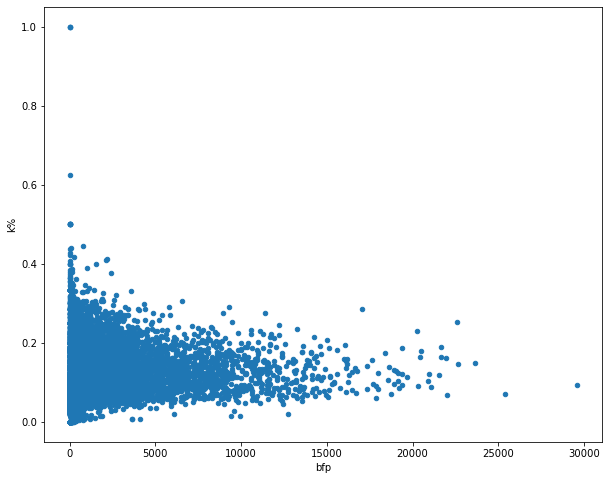

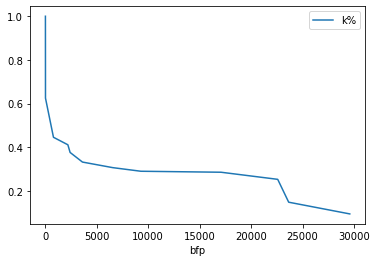

In [9]:
careers.plot.scatter(x='bfp', y='k%', figsize=(10,8))
all_time_leaders.plot.line(x='bfp', y='k%')

<AxesSubplot:xlabel='bfp', ylabel='so'>

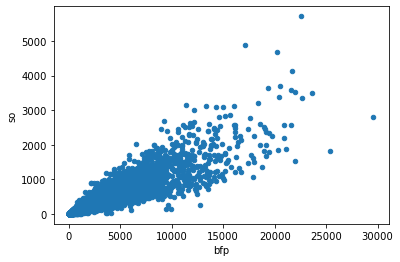

In [10]:
careers.plot.scatter(x='bfp', y='so')